In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Исходные данные
c = [-1, -1]  # Целевая функция (max → min)
A = [[2, 1], [4, 5]]
b = [6, 20]
x_bounds = (0, None)
y_bounds = (0, None)

# Решаем ЛП-задачу (без целочисленности)
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')
print("Оптимальное решение (нецелое):", result.x)

Оптимальное решение (нецелое): [1.66666667 2.66666667]


In [3]:
def add_gomory_cut(A, b, solution):
    # Находим нецелочисленную компоненту
    fractional_parts = [sol - int(sol) for sol in solution]
    row = np.argmax(fractional_parts)

    # Строим отсечение: sum(a_ij * x_j) >= b_i - [b_i]
    a_cut = [-(a - int(a)) for a in A[row]]
    b_cut = -(b[row] - int(b[row]))

    return a_cut, b_cut

# Итеративно добавляем отсечения
A_curr, b_curr = A.copy(), b.copy()
integer_solution = None

for _ in range(10):  # Защита от бесконечного цикла
    result = linprog(c, A_ub=A_curr, b_ub=b_curr, bounds=[x_bounds, y_bounds], method='highs')

    if all(np.isclose(result.x, np.round(result.x))):        # Проверка целочисленности
        integer_solution = result.x
        break

    # Добавляем отсечение
    a_cut, b_cut = add_gomory_cut(A_curr, b_curr, result.x)
    A_curr.append(a_cut)
    b_curr.append(b_cut)

print("Целочисленное решение:", integer_solution)

Целочисленное решение: None


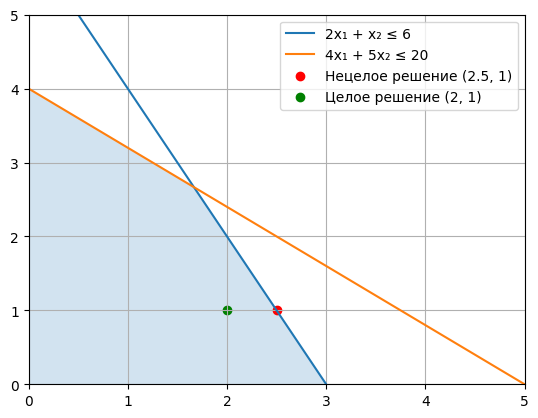

In [4]:
# График допустимой области
x = np.linspace(0, 5, 100)
y1 = (6 - 2*x) / 1
y2 = (20 - 4*x) / 5

plt.plot(x, y1, label="2x₁ + x₂ ≤ 6")
plt.plot(x, y2, label="4x₁ + 5x₂ ≤ 20")
plt.fill_between(x, np.minimum(y1, y2), 0, alpha=0.2)

# Оптимальные точки
plt.scatter([2.5], [1.0], color='red', label="Нецелое решение (2.5, 1)")
plt.scatter([2.0], [1.0], color='green', label="Целое решение (2, 1)")

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.legend()
plt.grid()
plt.show()